In [1]:
#!pip install imblearn --user  
#uncomment below only if imblearn is not installed 

#restart Jupyter engine again is still fails to import imblearn

In [2]:
# Importing the required libraries
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from imblearn.over_sampling import SMOTE 

from sklearn.metrics import confusion_matrix
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("telecom_churn_data.csv", sep=',', encoding='ISO-8859-1')

In [4]:
data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [5]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
mobile_number               int64
circle_id                   int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_6        object
last_date_of_month_7        object
last_date_of_month_8        object
last_date_of_month_9        object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float6

In [6]:
#function to get confusion metric parameters printed

def printingConfusionMetricDetails(confusion_metric):
    TP = confusion_metric[1,1] # true positive 
    TN = confusion_metric[0,0] # true negatives
    FP = confusion_metric[0,1] # false positives
    FN = confusion_metric[1,0] # false negatives


    print('Acuracy Score', accuracy_score(y_test,y_pred_default))
    print('Sensitivity: ', TP / float(TP+FN))
    print('Specificity: ',TN / float(TN+FP))
    print('false postive rate: ',FP/ float(TN+FP))
    print('positive predictive value: ', TP / float(TP+FP))
    print('Negative predictive value: ',TN / float(TN+ FN))
    print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))


In [7]:
#function to pring 
def printingMSEandRsquare(y_test, y_pred):
    mean_square_err = mean_squared_error(y_test, y_pred)
    r_square = r2_score(y_test, y_pred)
    print(mean_square_err)
    print(r_square)

In [8]:
data.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


In [9]:
#drop mobile number  - the number is not needed for any calculation or analysis
data.drop('mobile_number',axis=1,inplace=True)

In [10]:
#check for missing values
data.isna().sum()

circle_id                  0
loc_og_t2o_mou          1018
std_og_t2o_mou          1018
loc_ic_t2o_mou          1018
last_date_of_month_6       0
                        ... 
aon                        0
aug_vbc_3g                 0
jul_vbc_3g                 0
jun_vbc_3g                 0
sep_vbc_3g                 0
Length: 225, dtype: int64

In [11]:
#Missing value percencentages
missing_values = pd.DataFrame((data.isnull().sum()/len(data))*100).reset_index().rename(columns = {'index': 'feature', 0: 'Missing%'}).sort_values('Missing%',ascending = False)
missing_values

,feature,Missing%
188,arpu_3g_6,74.846748
176,av_rech_amt_data_6,74.846748
216,fb_user_6,74.846748
196,night_pck_user_6,74.846748
160,total_rech_data_6,74.846748
...,...,...
145,max_rech_amt_7,0.000000
144,max_rech_amt_6,0.000000
143,total_rech_amt_9,0.000000
142,total_rech_amt_8,0.000000


In [12]:
#Dropping columns where null are more than 95%
data.loc[:, data.isnull().mean() < .95]
# 1 column dropped

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,...,0,1.0,1.0,1.0,NaN,968,30.40,0.00,101.20,3.58
1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,355.074,...,0,NaN,1.0,1.0,NaN,1006,0.00,0.00,0.00,0.00
2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,189.058,...,0,NaN,NaN,NaN,1.0,1103,0.00,0.00,4.17,0.00
3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,251.102,...,0,NaN,NaN,NaN,NaN,2491,0.00,0.00,0.00,0.00
4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,309.876,...,0,0.0,NaN,NaN,NaN,1526,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,18.471,69.161,...,0,NaN,NaN,NaN,NaN,3199,0.00,0.00,0.00,0.00
99995,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,112.201,77.811,...,0,NaN,NaN,NaN,NaN,2052,0.00,0.00,0.00,0.00
99996,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,229.187,0.000,...,0,1.0,NaN,NaN,NaN,185,0.00,0.00,0.00,0.00
99997,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,322.991,303.386,...,0,1.0,1.0,1.0,1.0,478,1445.74,1151.03,1173.18,0.00


In [13]:
#DATA IMPUTATION
#We can also use MICE imputation 
#data imputation for categorical columns (fb and nigh pack users) as -1
data=data.fillna({'fb_user_6':-1,'fb_user_7':-1,'fb_user_8':-1})
data=data.fillna({'night_pck_user_6':-1,'night_pck_user_7':-1,'night_pck_user_8':-1})
#data imputation for non categorical as 0 which means no recharge happened
data=data.fillna(0)

In [14]:
#verifying imputation and null
data.isna().sum()

circle_id               0
loc_og_t2o_mou          0
std_og_t2o_mou          0
loc_ic_t2o_mou          0
last_date_of_month_6    0
                       ..
aon                     0
aug_vbc_3g              0
jul_vbc_3g              0
jun_vbc_3g              0
sep_vbc_3g              0
Length: 225, dtype: int64

In [15]:
#Missing value percencentages
missing_values = pd.DataFrame((data.isnull().sum()/len(data))*100).reset_index().rename(columns = {'index': 'feature', 0: 'Missing%'}).sort_values('Missing%',ascending = False)
missing_values

,feature,Missing%
0,circle_id,0.0
113,std_ic_t2o_mou_7,0.0
143,total_rech_amt_9,0.0
144,max_rech_amt_6,0.0
145,max_rech_amt_7,0.0
...,...,...
79,og_others_9,0.0
80,total_og_mou_6,0.0
81,total_og_mou_7,0.0
82,total_og_mou_8,0.0


In [16]:
## No missing values now 
##Renaming columns to get them inline with month codes
data =data.rename(columns={'jun_vbc_3g': 'vbc_3g_6', 'jul_vbc_3g': 'vbc_3g_7',
                           'aug_vbc_3g': 'vbc_3g_8','sep_vbc_3g': 'vbc_3g_9'})

In [17]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 225 columns):
circle_id                   int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_6        object
last_date_of_month_7        object
last_date_of_month_8        object
last_date_of_month_9        object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float64
roam_og_mou_6               floa

In [18]:
#data.describe()
data.shape

(99999, 225)

In [19]:
#Deriving Features - 
data['amt_data_6'] = data.total_rech_amt_6 + data.total_rech_data_6           
data['amt_data_7'] = data.total_rech_amt_7 + data.total_rech_data_7
data['amt_data_8'] = data.total_rech_amt_8 + data.total_rech_data_8

#  average recharge by customer in June and July
data['avg_amt_data_6_7'] = (data.amt_data_6 + data.amt_data_7)/2

#Retaining customers whose recharge amount is >= 70th percentile amount

data_filtered = data.loc[data.avg_amt_data_6_7 >= data.avg_amt_data_6_7.quantile(0.7), :]
data_filtered = data_filtered.reset_index(drop=True)
data_filtered.shape

(30019, 229)

In [20]:
data_filtered["last_date_of_month_6"] = pd.to_datetime(data_filtered["last_date_of_month_6"])
data_filtered["last_date_of_month_7"] = pd.to_datetime(data_filtered["last_date_of_month_7"])
data_filtered["last_date_of_month_8"] = pd.to_datetime(data_filtered["last_date_of_month_8"])
data_filtered["date_of_last_rech_6"] = pd.to_datetime(data_filtered["date_of_last_rech_6"])
data_filtered["date_of_last_rech_7"] = pd.to_datetime(data_filtered["date_of_last_rech_7"])
data_filtered["date_of_last_rech_8"] = pd.to_datetime(data_filtered["date_of_last_rech_8"])

#3 new columns for days since recharge.
data_filtered["days_since_recharge_6"] = data_filtered["last_date_of_month_6"] - data_filtered["date_of_last_rech_6"]
data_filtered["days_since_recharge_7"] = data_filtered["last_date_of_month_7"] - data_filtered["date_of_last_rech_7"]
data_filtered["days_since_recharge_8"] = data_filtered["last_date_of_month_8"] - data_filtered["date_of_last_rech_8"]

#converting into days
data_filtered["days_since_recharge_6"] = data_filtered["days_since_recharge_6"].dt.days
data_filtered["days_since_recharge_7"] = data_filtered["days_since_recharge_7"].dt.days
data_filtered["days_since_recharge_8"] = data_filtered["days_since_recharge_8"].dt.days

date_columns_to_be_dropped = ["last_date_of_month_6","last_date_of_month_7","last_date_of_month_8", 
                              "date_of_last_rech_6", "date_of_last_rech_7", "date_of_last_rech_8",
                              "date_of_last_rech_data_6","date_of_last_rech_data_7","date_of_last_rech_data_8"]
data_filtered = data_filtered.drop(columns=date_columns_to_be_dropped)
data_filtered.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30019 entries, 0 to 30018
Data columns (total 223 columns):
circle_id                   int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_9        object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float64
roam_og_mou_6               float64
roam_og_mou_7               float64
roam_og_mou_8               float64
roam_og_mou_9               f

In [21]:
data_filtered.shape
#before outlier

(30019, 223)

In [22]:
# HANDLING OUTLIERS
#z_scores = stats.zscore(data_filtered)

#abs_z_scores = np.abs(z_scores)
#filtered_entries = (abs_z_scores < 3).all(axis=1)
#data_filtered = data_filtered[filtered_entries]

#Using Quantile method ##method is removing all churn_flag=1 rows
Q1 = data_filtered.quantile(0.1)
Q3 = data_filtered.quantile(0.9)
IQR = Q3 - Q1

#data_filtered = data_filtered[~((data_filtered < (Q1 - 1.5 * IQR)) |(data_filtered > (Q3 + 1.5 * IQR))).any(axis=1)]
#data_filtered.info(verbose=True)

In [23]:
data_filtered.shape
#after outlier treatment

(30019, 223)

In [24]:
#Identifying Churn customers
data_filtered['churn_flag'] = np.where(((data_filtered['total_ic_mou_9'] == 0.00) | (data_filtered['total_og_mou_9'] == 0.00))
                            & ((data_filtered['vol_2g_mb_9'] == 0.00) | (data_filtered['vol_3g_mb_9'] == 0.00))
                            , 1, 0)
print(data_filtered['churn_flag'].value_counts())


0    26973
1     3046
Name: churn_flag, dtype: int64


In [25]:
#CONSOLIDATION OF OTHER VALUES IS NEEDED 

In [26]:
#now that every column follows same naming patter drop features related to Churn Phase
data_filtered = data_filtered.drop(data_filtered.filter(regex='_9', axis = 1).columns, axis=1)
data_filtered.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30019 entries, 0 to 30018
Data columns (total 169 columns):
circle_id                int64
loc_og_t2o_mou           float64
std_og_t2o_mou           float64
loc_ic_t2o_mou           float64
arpu_6                   float64
arpu_7                   float64
arpu_8                   float64
onnet_mou_6              float64
onnet_mou_7              float64
onnet_mou_8              float64
offnet_mou_6             float64
offnet_mou_7             float64
offnet_mou_8             float64
roam_ic_mou_6            float64
roam_ic_mou_7            float64
roam_ic_mou_8            float64
roam_og_mou_6            float64
roam_og_mou_7            float64
roam_og_mou_8            float64
loc_og_t2t_mou_6         float64
loc_og_t2t_mou_7         float64
loc_og_t2t_mou_8         float64
loc_og_t2m_mou_6         float64
loc_og_t2m_mou_7         float64
loc_og_t2m_mou_8         float64
loc_og_t2f_mou_6         float64
loc_og_t2f_mou_7         float64
l

In [27]:
#Plotting heatmap to get an overall picture
#plt.figure(figsize = (50, 30))
#sns.heatmap(data_filtered.corr(), annot = True, cmap="YlGnBu")
#plt.show()

In [28]:
## Heatmap is not of much help with large no of features
#Analysing further all numeric (float and int) variables in the dataset
#Its one and the same now ..selection is not needed .. all numeric DF
#data_numeric = data_filtered.select_dtypes(include=['float64', 'int64','int32'])

data_numeric=data_filtered
data_numeric.head()

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,vbc_3g_7,vbc_3g_6,amt_data_6,amt_data_7,amt_data_8,avg_amt_data_6_7,days_since_recharge_6,days_since_recharge_7,days_since_recharge_8,churn_flag
0,109,0.0,0.0,0.0,1069.180,1349.850,3171.480,57.84,54.68,52.29,...,19.38,18.74,1580.0,790.0,3638.0,1185.0,3,6,5,1
1,109,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,...,910.65,122.16,437.0,603.0,123.0,520.0,5,0,1,0
2,109,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,...,0.00,0.00,507.0,253.0,720.0,380.0,10,9,1,0
3,109,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,...,2.45,21.89,570.0,348.0,160.0,459.0,0,0,17,0
4,109,0.0,0.0,0.0,690.008,18.980,25.499,1185.91,9.28,7.79,...,0.00,0.00,816.0,0.0,30.0,408.0,0,1,6,0


In [29]:
correlation = data_numeric.corr()
correlation

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,vbc_3g_7,vbc_3g_6,amt_data_6,amt_data_7,amt_data_8,avg_amt_data_6_7,days_since_recharge_6,days_since_recharge_7,days_since_recharge_8,churn_flag
circle_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loc_og_t2o_mou,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std_og_t2o_mou,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loc_ic_t2o_mou,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
arpu_6,NaN,NaN,NaN,NaN,1.000000,0.631603,0.571027,0.291466,0.142720,0.116785,...,0.123493,0.172676,0.941311,0.608024,0.565347,0.869008,-0.040223,0.000132,0.018859,0.058438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
avg_amt_data_6_7,NaN,NaN,NaN,NaN,0.869008,0.890972,0.737276,0.229281,0.227797,0.189846,...,0.152801,0.144810,0.882371,0.892326,0.714702,1.000000,-0.008149,-0.008738,-0.003386,0.009734
days_since_recharge_6,NaN,NaN,NaN,NaN,-0.040223,0.007753,0.014882,-0.021534,0.009368,0.007667,...,-0.010855,-0.013781,-0.059689,0.043088,-0.003962,-0.008149,1.000000,-0.002028,0.056297,0.035712
days_since_recharge_7,NaN,NaN,NaN,NaN,0.000132,-0.026051,-0.027658,0.013301,-0.019921,-0.013377,...,-0.014986,-0.008861,0.053100,-0.066131,-0.030695,-0.008738,-0.002028,1.000000,0.147690,0.062829
days_since_recharge_8,NaN,NaN,NaN,NaN,0.018859,-0.061927,-0.086346,-0.009344,-0.033838,-0.053130,...,-0.019842,-0.016792,0.030428,-0.035076,-0.124758,-0.003386,0.056297,0.147690,1.000000,0.132574


In [30]:
#Top 5 correlation
print (correlation['churn_flag'].sort_values(ascending=False)[:6], '\n')

churn_flag               1.000000
days_since_recharge_8    0.132574
std_og_mou_6             0.128642
std_og_t2m_mou_6         0.097622
roam_og_mou_7            0.092735
std_og_t2t_mou_6         0.092617
Name: churn_flag, dtype: float64 



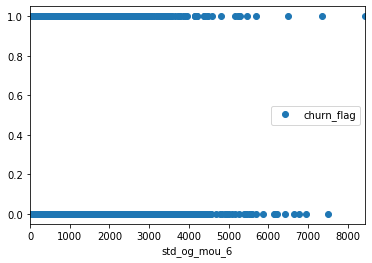

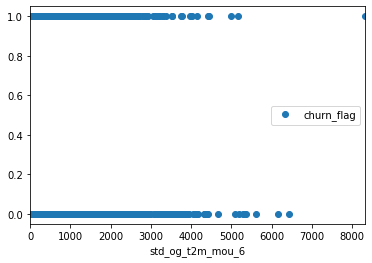

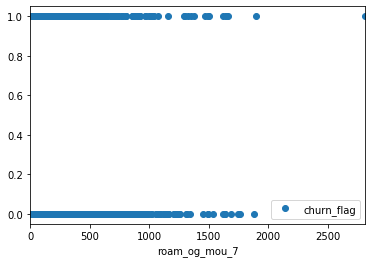

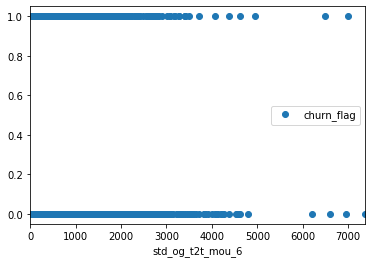

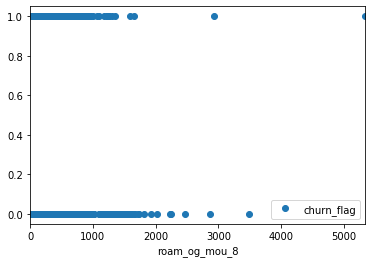

In [31]:
data_numeric.plot(y='churn_flag', x='std_og_mou_6',style ='o')
data_numeric.plot(y='churn_flag', x='std_og_t2m_mou_6',style ='o')
data_numeric.plot(y='churn_flag', x='roam_og_mou_7',style ='o')
data_numeric.plot(y='churn_flag', x='std_og_t2t_mou_6',style ='o')
data_numeric.plot(y='churn_flag', x='roam_og_mou_8',style ='o')


In [32]:
#Analysing categorical variables
#data_nonnum= data_filtered.select_dtypes(exclude=['float64', 'int64'])
#data_nonnum.describe()

In [33]:
data_filtered.shape

(30019, 169)

In [34]:
# create box plot for  6th, 7th and 8th month
def plot_box_chart(attribute):
    plt.figure(figsize=(20,16))
    df = data_filtered
    plt.subplot(2,3,1)
    sns.boxplot(data=df, y=attribute+"_6",x="churn_flag",hue="churn_flag",
                showfliers=False,palette=("plasma"))
    plt.subplot(2,3,2)
    sns.boxplot(data=df, y=attribute+"_7",x="churn_flag",hue="churn_flag",
                showfliers=False,palette=("plasma"))
    plt.subplot(2,3,3)
    sns.boxplot(data=df, y=attribute+"_8",x="churn_flag",hue="churn_flag",
                showfliers=False,palette=("plasma"))
    plt.show()

In [35]:
recharge_amnt_columns =  data_filtered.columns[data_filtered.columns.str.contains('rech_amt')]
recharge_amnt_columns.tolist()


['total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8']

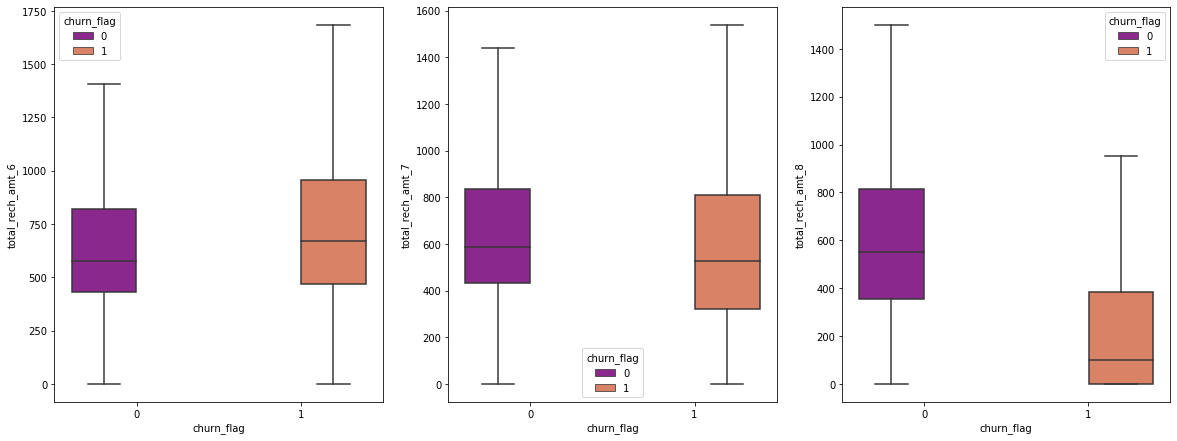

In [36]:
# Ploting for total recharge amount:
plot_box_chart('total_rech_amt')
#can see a drop in rechargeable amount down in 8th month for churning customers

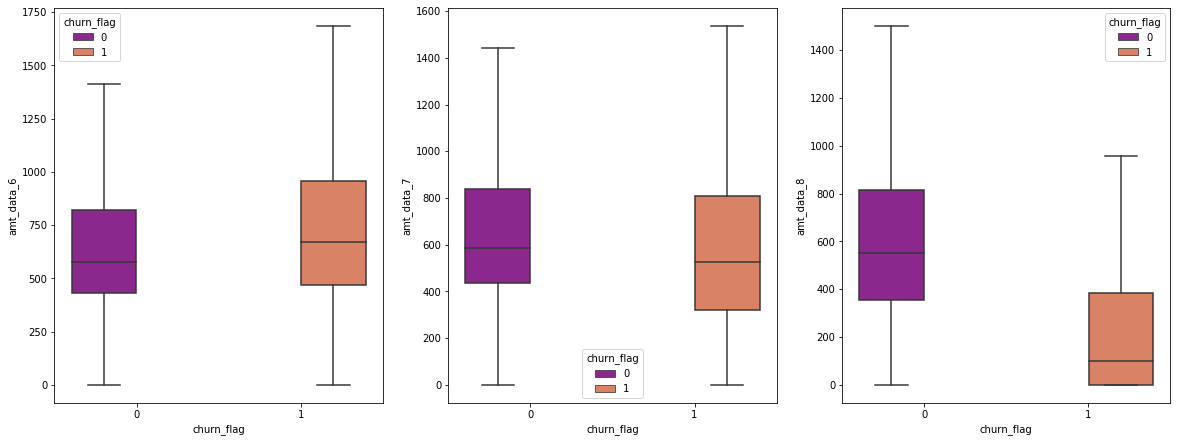

In [37]:
# Ploting for total recharge amount for data:
plot_box_chart('amt_data')
#recharge amount drops in 8th month for churning customers

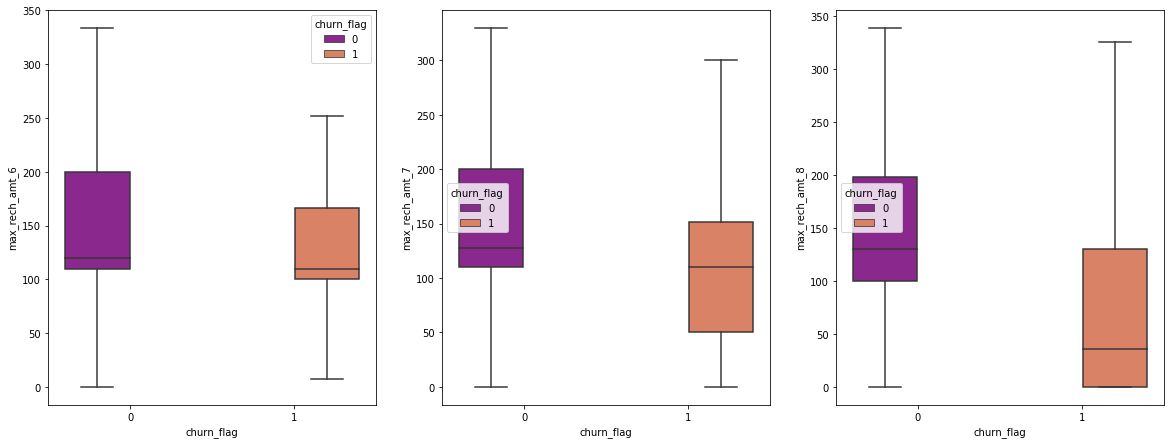

In [38]:
# Ploting for total recharge amount for data:
plot_box_chart('max_rech_amt')
#Max recharge amount drops in 8th month for churning customers

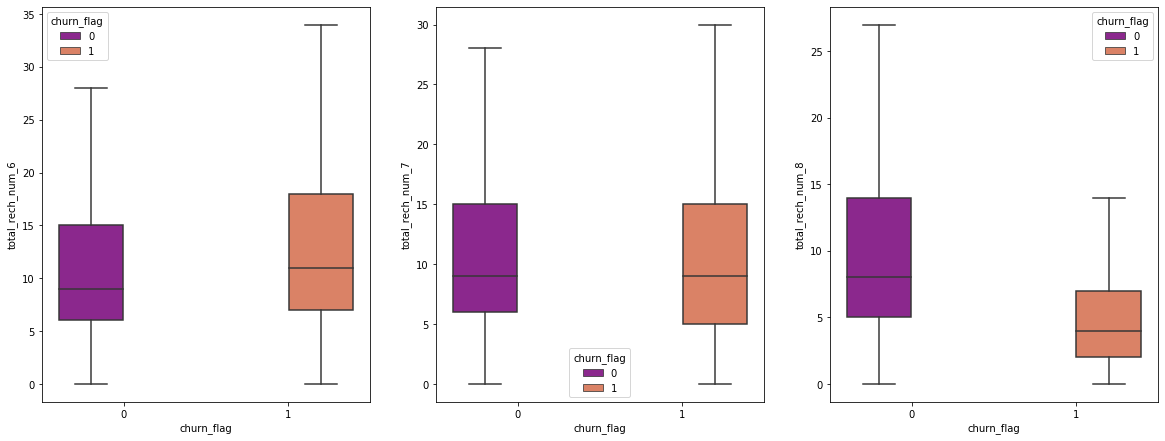

In [39]:
# Ploting for Total recharge for Number:
plot_box_chart('total_rech_num')
#total recharge number drops in 8th month for churning customers

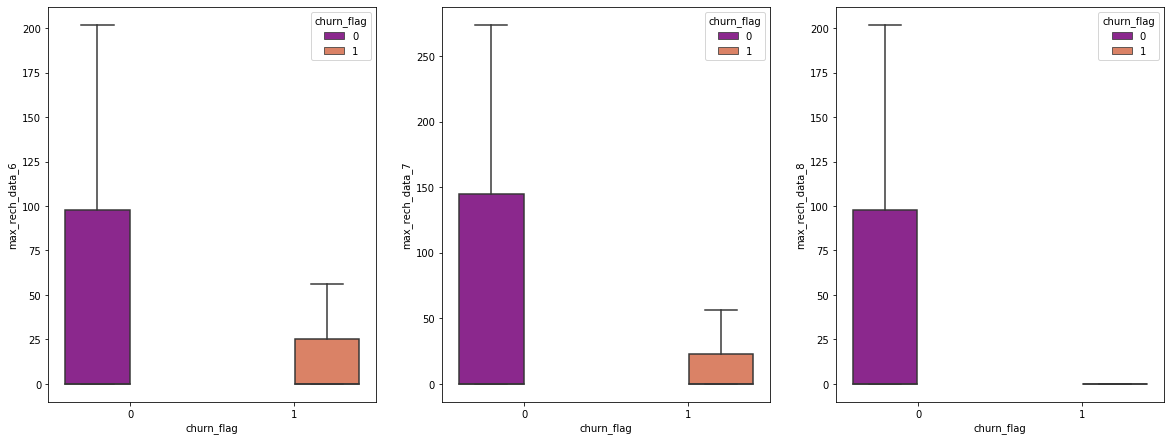

In [40]:
# Ploting for maximum recharge for data:
plot_box_chart('max_rech_data')
#recharge data is almost going to nill in 8th month for churning customers

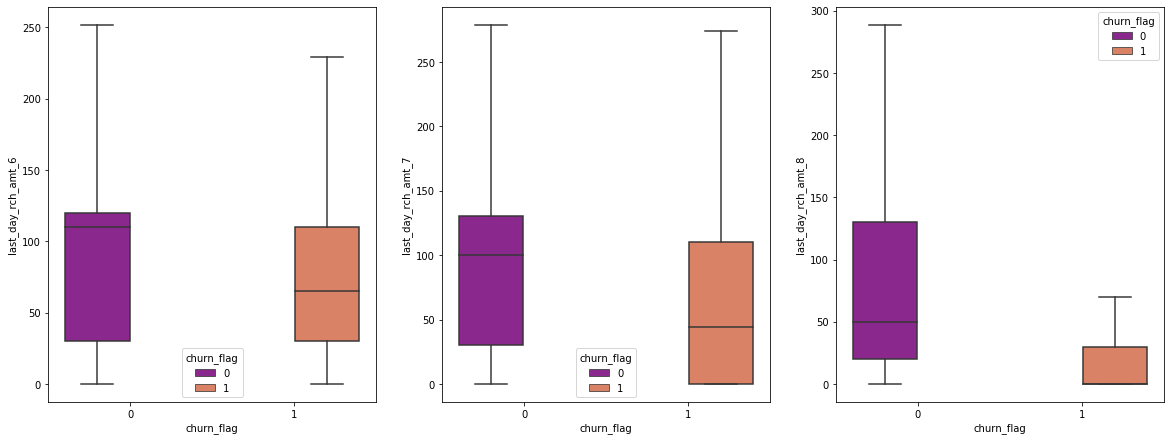

In [41]:
# Ploting for last day recharge amount:
plot_box_chart('last_day_rch_amt')

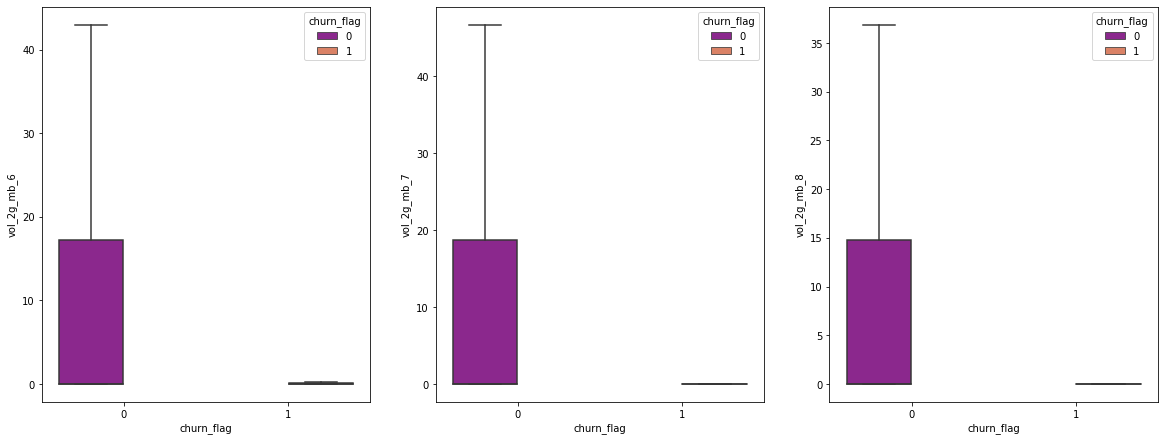

In [42]:
# Ploting for volume of 2G and 3G usage columns:
plot_box_chart('vol_2g_mb')

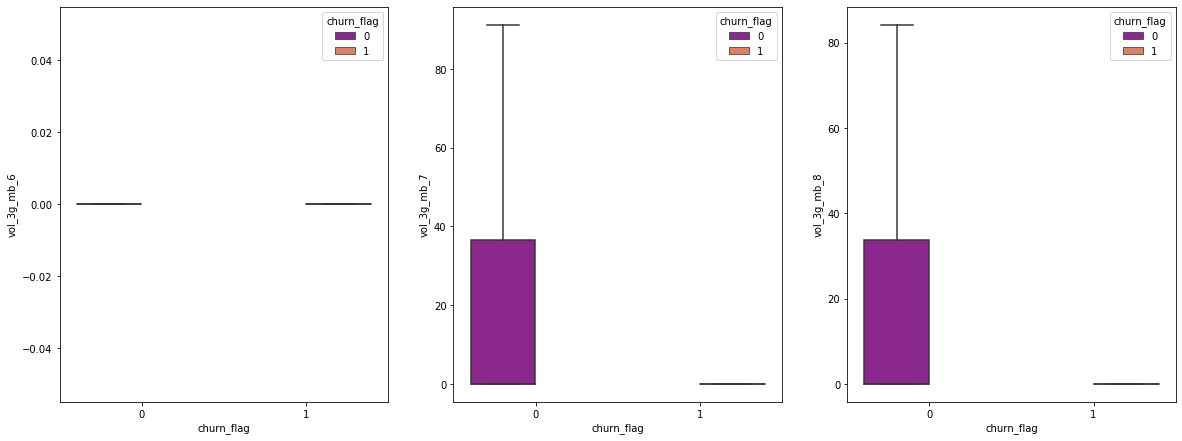

In [43]:
plot_box_chart('vol_3g_mb')

In [44]:
mou_og_cols6 = data_filtered.columns[data_filtered.columns.str.contains('.*_og_.*mou_6',regex=True)]

In [45]:
def heatmap(x,y,dataframe):
    plt.figure(figsize=(x,y))
    sns.heatmap(dataframe.corr(),cmap="OrRd",annot=True)
    plt.show()

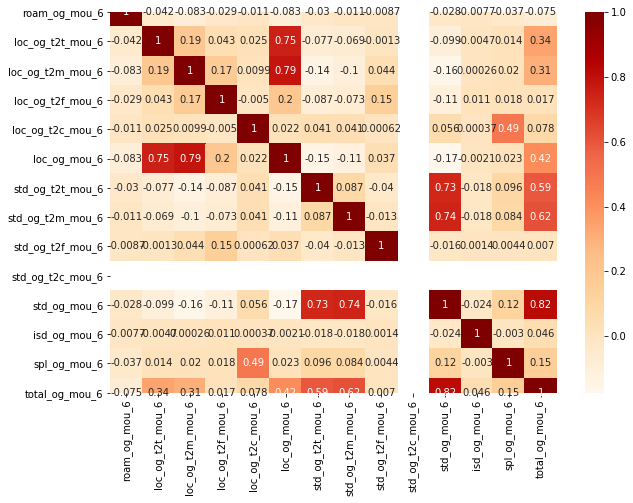

In [46]:
heatmap(10, 7,data_filtered.filter(mou_og_cols6))

In [47]:
print(data_filtered.loc[8,'total_og_mou_6'],"==",data_filtered.loc[8,['loc_og_mou_6','std_og_mou_6','spl_og_mou_6','isd_og_mou_6','og_others_6']].sum())
print(data_filtered.loc[8,'std_og_mou_6'],"==",data_filtered.loc[8,['std_og_t2m_mou_6','std_og_t2t_mou_6','std_og_t2f_mou_6','std_og_loc_mou_6']].sum())
print(data_filtered.loc[8,'loc_og_mou_6'],"==",data_filtered.loc[8,['loc_og_t2m_mou_6','loc_og_t2t_mou_6','loc_og_t2f_mou_6','loc_og_2tc_mou_6']].sum())

337.86 == 337.84999999999997
274.21 == 274.20000000000005
63.64 == 63.64


In [48]:
list_total_og_cols = data_filtered.columns[data_filtered.columns.str.contains('total_og_mou|std_og_mou|loc_og_mou',regex=True)]
data_filtered.drop(list_total_og_cols,axis=1,inplace=True)
print("Columns dropped - ")
print(list_total_og_cols.tolist())

Columns dropped - 
['loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8']


In [49]:
mou_ic_cols6 = data_filtered.columns[data_filtered.columns.str.contains('.*_ic_.*mou_6',regex=True)]

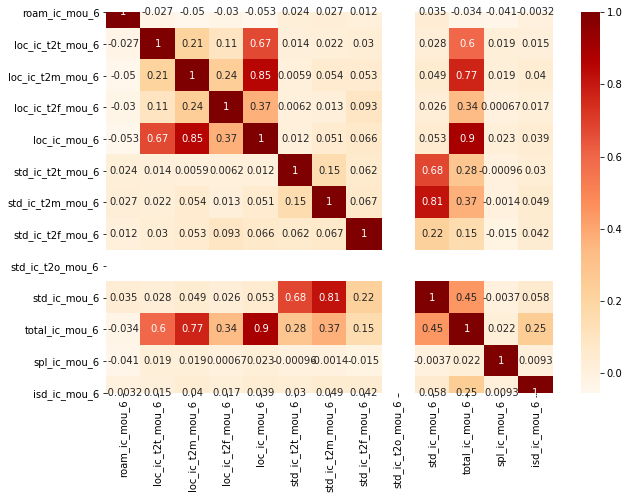

In [50]:
heatmap(10,7,data_filtered.filter(mou_ic_cols6))

In [51]:
print(data_filtered.loc[21,'total_ic_mou_6'],"==",data_filtered.loc[21,['loc_ic_mou_6','roam_ic_mou_6','isd_ic_mou_6','spl_ic_mou_6','std_ic_mou_6']].sum())
print(data_filtered.loc[21,'loc_ic_mou_6'],"==",data_filtered.loc[21,['loc_ic_t2t_mou_6','loc_ic_t2m_mou_6','loc_ic_t2f_mou_6','loc_ic_t2c_mou_6']].sum())
print(data_filtered.loc[21,'std_ic_mou_6'],"==",data_filtered.loc[21,['std_ic_t2t_mou_6','std_ic_t2m_mou_6','std_ic_t2f_mou_6','std_ic_t2c_mou_6']].sum())

392.69 == 392.68999999999994
350.78 == 350.76
41.91 == 41.9


In [52]:
list_total_ic_cols = data_filtered.columns[data_filtered.columns.str.contains('total_ic_mou|std_ic_mou|loc_ic_mou',regex=True)]
data_filtered.drop(list_total_ic_cols,axis=1,inplace=True)
print("Columns dropped - ")
list_total_ic_cols.tolist()

Columns dropped - 


['loc_ic_mou_6',
 'loc_ic_mou_7',
 'loc_ic_mou_8',
 'std_ic_mou_6',
 'std_ic_mou_7',
 'std_ic_mou_8',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'total_ic_mou_8']

In [53]:
data_filtered.drop('avg_amt_data_6_7',axis=1,inplace=True)

In [54]:
col_list = data_filtered.filter(regex='_6|_7').columns.str[:-2]
for idx, col in enumerate(col_list.unique()):
    print(col)
    avg_col_name = "avg_"+col+"_av67"
    col_6 = col+"_6"
    col_7 = col+"_7"
    data_filtered[avg_col_name] = (data_filtered[col_6]  + data_filtered[col_7])/ 2

arpu
onnet_mou
offnet_mou
roam_ic_mou
roam_og_mou
loc_og_t2t_mou
loc_og_t2m_mou
loc_og_t2f_mou
loc_og_t2c_mou
std_og_t2t_mou
std_og_t2m_mou
std_og_t2f_mou
std_og_t2c_mou
isd_og_mou
spl_og_mou
og_others
loc_ic_t2t_mou
loc_ic_t2m_mou
loc_ic_t2f_mou
std_ic_t2t_mou
std_ic_t2m_mou
std_ic_t2f_mou
std_ic_t2o_mou
spl_ic_mou
isd_ic_mou
ic_others
total_rech_num
total_rech_amt
max_rech_amt
last_day_rch_amt
total_rech_data
max_rech_data
count_rech_2g
count_rech_3g
av_rech_amt_data
vol_2g_mb
vol_3g_mb
arpu_3g
arpu_2g
night_pck_user
monthly_2g
sachet_2g
monthly_3g
sachet_3g
fb_user
vbc_3g
amt_data
days_since_recharge


In [55]:
col_list_to_drop = data_filtered.filter(regex='_6|_7')
data_filtered.drop(col_list_to_drop,axis=1,inplace=True)
print (data_filtered.shape)

(30019, 102)


In [56]:

#SPLITTING DATA SET
# Putting feature variable to X
from sklearn.model_selection import train_test_split

X = data_filtered.drop(['churn_flag'],axis=1)

# Putting response variable to y
y = data_filtered['churn_flag']
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.7,test_size=0.3, random_state=100)
print ("Shape of Train dataset",X_train.shape, y_train.shape)
print ("Shape of Test dataset",X_test.shape, y_test.shape)


Shape of Train dataset (21013, 101) (21013,)
Shape of Test dataset (9006, 101) (9006,)


In [57]:
#TREATING CLASS IMBALANCE
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))
sm =  SMOTE(random_state = 27)
X_train, y_train = sm.fit_sample(X_train, y_train.ravel()) 
  
print('After OverSampling, the shape of train_X: {}'.format(X_train.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train.shape)) 

print("After OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train == 0))) 


Before OverSampling, counts of label '1': 2120
Before OverSampling, counts of label '0': 18893 

After OverSampling, the shape of train_X: (37786, 101)
After OverSampling, the shape of train_y: (37786,) 

After OverSampling, counts of label '1': 18893
After OverSampling, counts of label '0': 18893


In [58]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train) 

train_after_scaling = scaler.transform(X_train)
test_after_scaling = scaler.transform(X_test)

In [59]:
logreg = LogisticRegression()

logreg.fit(train_after_scaling, y_train)

lr = LogisticRegression(solver = 'lbfgs')


In [60]:
#list(zip(X_train.columns, rfe.support_, rfe.ranking_))

In [61]:
y_pred = logreg.predict(test_after_scaling)

In [62]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [63]:
y_pred.size

9006

In [64]:
y_test

22519    0
13786    0
10796    0
28647    0
591      0
        ..
16521    1
27496    0
17815    0
6607     0
20077    0
Name: churn_flag, Length: 9006, dtype: int32

In [65]:
printingMSEandRsquare(y_test, y_pred)

0.1483455474128359
-0.608111113487158


In [66]:
confusion_matrix_1 = confusion_matrix(y_test, y_pred)
print(confusion_matrix_1)


[[6962 1118]
 [ 218  708]]


In [67]:
y_pred_default = y_pred
printingConfusionMetricDetails(confusion_matrix_1)

Acuracy Score 0.8516544525871641
Sensitivity:  0.7645788336933045
Specificity:  0.8616336633663366
false postive rate:  0.13836633663366338
positive predictive value:  0.3877327491785323
Negative predictive value:  0.9696378830083565
Misclassification Rate:  0.1483455474128359


In [68]:
x = train_after_scaling

In [69]:
from sklearn.decomposition import PCA

In [70]:
pca = PCA(random_state=42)

In [71]:
pca.fit(x)

PCA(random_state=42)

In [72]:
pca.components_

array([[-1.59096989e-19, -2.22044605e-16, -1.11022302e-16, ...,
         1.48073321e-01,  9.39905384e-02, -1.33301617e-02],
       [ 1.52471030e-19, -0.00000000e+00, -1.11022302e-16, ...,
        -3.61834601e-02,  2.58967737e-01, -2.13689738e-03],
       [-1.18707100e-19, -8.32667268e-17,  2.36789754e-16, ...,
        -6.67534544e-02,  4.88335363e-03, -2.88783092e-02],
       ...,
       [ 0.00000000e+00,  6.71266957e-01, -6.32859876e-02, ...,
         1.38777878e-16,  2.62326245e-03, -1.38777878e-17],
       [ 9.99999957e-01,  8.63997937e-05,  4.24702482e-05, ...,
         1.94817578e-20,  5.81946784e-06,  2.20228566e-19],
       [-0.00000000e+00, -2.87680277e-01,  1.42639190e-02, ...,
         2.77555756e-17, -1.02559352e-01, -0.00000000e+00]])

In [73]:
pca.explained_variance_ratio_

array([1.53144961e-01, 8.01914170e-02, 6.24312109e-02, 4.88506666e-02,
       3.57087057e-02, 3.27728087e-02, 2.97612487e-02, 2.87129544e-02,
       2.59354056e-02, 2.45610044e-02, 2.20714891e-02, 2.14776848e-02,
       2.02639011e-02, 1.90812180e-02, 1.80370333e-02, 1.77919674e-02,
       1.73451162e-02, 1.61139911e-02, 1.50842592e-02, 1.35666070e-02,
       1.32816087e-02, 1.31110084e-02, 1.24457936e-02, 1.22087361e-02,
       1.20707307e-02, 1.18768989e-02, 1.14065642e-02, 1.09950620e-02,
       1.04232142e-02, 9.80167919e-03, 9.29514290e-03, 8.95333731e-03,
       8.85433784e-03, 8.25697557e-03, 8.18399180e-03, 7.75987950e-03,
       7.54319331e-03, 7.47082209e-03, 7.28505378e-03, 6.73803567e-03,
       6.64444613e-03, 6.42198340e-03, 5.99447204e-03, 5.14809349e-03,
       4.74604342e-03, 4.44448538e-03, 4.30053351e-03, 3.95821129e-03,
       3.85246487e-03, 3.60812972e-03, 3.47565808e-03, 3.36659235e-03,
       3.11200239e-03, 2.96084828e-03, 2.88561889e-03, 2.79795742e-03,
      

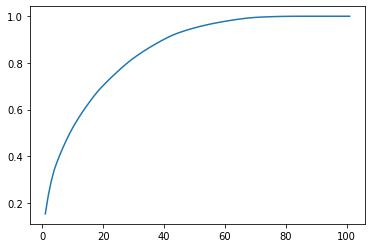

In [74]:
#70 components explain close to 90 percent of variace
import matplotlib.pyplot as plt
var_cumu = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1,len(var_cumu)+1), var_cumu)

In [75]:
#pc2 = PCA(n_components=75, random_state=42)
from sklearn.decomposition import IncrementalPCA

pcaFinal = IncrementalPCA(n_components=70)
train_pca = pcaFinal.fit_transform(train_after_scaling)
train_pca.shape

(37786, 70)

In [76]:
#Applying selected components to the test data - 70 components
test_pca = pcaFinal.fit_transform(test_after_scaling)
test_pca.shape 


(9006, 70)

In [77]:
train_pca

array([[-1.80528847e+00,  9.05938018e-01, -5.49110522e-01, ...,
        -1.17857740e-02,  1.99174799e-02,  6.33795286e-03],
       [ 3.24319077e+00, -4.09504486e+00,  8.30737102e+00, ...,
         1.89396387e-02, -2.32407397e-01, -7.40045724e-02],
       [-1.19639934e+00, -1.55639003e+00, -2.19260286e-01, ...,
         3.30234868e-01,  5.87206569e-02, -6.82611093e-02],
       ...,
       [-2.67918745e+00, -2.57749913e-02, -5.05211465e-01, ...,
        -2.50943819e-02,  2.69662324e-02,  3.62721200e-02],
       [-1.27309993e+00, -1.29523641e-01, -4.59541812e-01, ...,
         4.77633082e-01,  1.46506557e-02,  5.06517638e-02],
       [-8.81730752e-01, -1.06063883e+00,  1.50785815e+00, ...,
         7.38419969e-02, -1.35819937e-01, -8.33621017e-02]])

In [78]:
y_train.shape

(37786,)

In [79]:
logreg = LogisticRegression()

logreg.fit(train_pca, y_train)

LogisticRegression()

In [80]:
y_pred = logreg.predict(test_pca)


In [81]:
y_pred

array([0, 1, 1, ..., 1, 1, 0])

In [82]:
y_pred.size

9006

In [83]:
y_test

22519    0
13786    0
10796    0
28647    0
591      0
        ..
16521    1
27496    0
17815    0
6607     0
20077    0
Name: churn_flag, Length: 9006, dtype: int32

In [84]:
printingMSEandRsquare(y_test, y_pred)

0.4827892516100378
-4.233583174732158


In [85]:
confusion_matrix2 = confusion_matrix(y_test, y_pred)
print(confusion_matrix2)
y_pred_default = y_pred

[[4050 4030]
 [ 318  608]]


In [86]:
printingConfusionMetricDetails(confusion_matrix2)

Acuracy Score 0.5172107483899623
Sensitivity:  0.6565874730021598
Specificity:  0.5012376237623762
false postive rate:  0.49876237623762376
positive predictive value:  0.13109098749460973
Negative predictive value:  0.9271978021978022
Misclassification Rate:  0.4827892516100378


In [87]:
# Decision tree after Logistic regression

# Importing decision tree classifier from sklearn library

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=5, class_weight='balanced')
dt_default.fit(train_pca,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5)

In [88]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_pred_default = dt_default.predict(test_pca)

# # Printing classification report
# print(classification_report(y_test, y_pred_default))

# from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
print(classification_report(y_test,y_pred_default))
print(confusion_matrix(y_test,y_pred_default))
print('Acuracy Score', accuracy_score(y_test,y_pred_default))

              precision    recall  f1-score   support

           0       0.93      0.51      0.66      8080
           1       0.14      0.69      0.23       926

    accuracy                           0.52      9006
   macro avg       0.54      0.60      0.44      9006
weighted avg       0.85      0.52      0.61      9006

[[4090 3990]
 [ 291  635]]
Acuracy Score 0.5246502331778814


In [89]:
confusion_tree = confusion_matrix(y_test,y_pred_default)
printingConfusionMetricDetails(confusion_tree)

Acuracy Score 0.5246502331778814
Sensitivity:  0.6857451403887689
Specificity:  0.5061881188118812
false postive rate:  0.4938118811881188
positive predictive value:  0.1372972972972973
Negative predictive value:  0.9335768089477289
Misclassification Rate:  0.4753497668221186


In [90]:
########## lets tune hyper parameters
# GridSearchCV to find optimal max_depth

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(1, 40)}


In [91]:
# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", class_weight='balanced', random_state = 100)


In [92]:
# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", return_train_score=True,  n_jobs = -1)


In [93]:
tree.fit(train_pca,y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=100),
             n_jobs=-1, param_grid={'max_depth': range(1, 40)},
             return_train_score=True, scoring='accuracy')

In [94]:
y_train.shape

(37786,)

In [95]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.599099,0.012366,0.005185,0.000398,1,{'max_depth': 1},0.668960,0.681090,0.676856,0.672357,...,0.675912,0.004645,39,0.678510,0.675345,0.676536,0.677594,0.674716,0.676540,0.001396
1,1.259745,0.139092,0.009973,0.005606,2,{'max_depth': 2},0.712755,0.717877,0.714305,0.672357,...,0.706002,0.016927,38,0.718109,0.717027,0.717854,0.677594,0.712164,0.708550,0.015628
2,1.918901,0.103885,0.005585,0.001739,3,{'max_depth': 3},0.755755,0.763531,0.762075,0.745137,...,0.758059,0.007089,37,0.764655,0.762943,0.764068,0.748619,0.764001,0.760857,0.006144
3,2.713575,0.523233,0.015160,0.017912,4,{'max_depth': 4},0.770310,0.782321,0.773455,0.743681,...,0.769359,0.013445,36,0.784604,0.779086,0.781501,0.753581,0.775580,0.774870,0.011047
4,4.786907,1.011616,0.010161,0.008891,5,{'max_depth': 5},0.787510,0.791716,0.788673,0.780336,...,0.789790,0.006616,35,0.801145,0.797479,0.797777,0.793113,0.801416,0.798186,0.003020


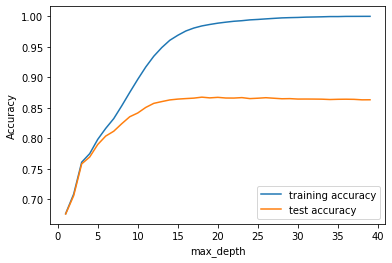

In [96]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# seems 15 or 20 Max depth

In [97]:
## Lets tune min sample leaf
# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini",class_weight='balanced',random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", return_train_score=True , n_jobs = -1)
tree.fit(train_pca,y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=100),
             n_jobs=-1, param_grid={'min_samples_leaf': range(5, 200, 20)},
             return_train_score=True, scoring='accuracy')

In [98]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,6.861810,0.228573,0.005984,5.519789e-07,5,{'min_samples_leaf': 5},0.856576,0.853116,0.849543,0.860262,...,0.855767,0.003984,1,0.956497,0.958219,0.956466,0.958616,0.956532,0.957266,0.000949
1,5.692106,0.473520,0.019348,2.673562e-02,25,{'min_samples_leaf': 25},0.831966,0.843986,0.843192,0.838693,...,0.839359,0.004274,2,0.888911,0.888154,0.887360,0.884846,0.883853,0.886625,0.001947
2,6.480305,0.798618,0.005984,6.306757e-04,45,{'min_samples_leaf': 45},0.824028,0.833796,0.832209,0.830621,...,0.830228,0.003326,3,0.866779,0.863277,0.863740,0.863475,0.865096,0.864474,0.001317
3,6.238136,0.236537,0.007979,3.153921e-03,65,{'min_samples_leaf': 65},0.817544,0.826783,0.824534,0.824666,...,0.824062,0.003402,4,0.855531,0.848391,0.849284,0.851699,0.849780,0.850937,0.002539
4,5.492926,0.231015,0.009574,7.208921e-03,85,{'min_samples_leaf': 85},0.805901,0.822813,0.823210,0.817917,...,0.818108,0.006386,5,0.846632,0.838930,0.840550,0.840815,0.843197,0.842025,0.002677


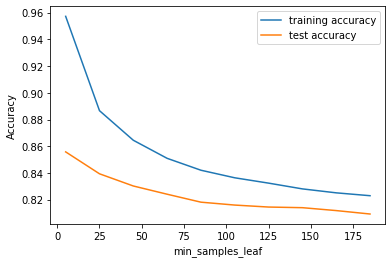

In [99]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#seems 5 to 75

In [100]:
## Tuning min sample split
# parameters to build the model on
parameters = {'min_samples_split': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini",class_weight='balanced', random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", return_train_score=True,  n_jobs = -1)
tree.fit(train_pca,y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=100),
             n_jobs=-1, param_grid={'min_samples_split': range(5, 200, 20)},
             return_train_score=True, scoring='accuracy')

In [101]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,11.479203,1.081496,0.010573,0.004214,5,{'min_samples_split': 5},0.859884,0.860924,0.864364,0.858277,...,0.861377,0.002246,1,0.993251,0.993252,0.993715,0.993483,0.992391,0.993218,0.000448
1,13.859630,1.476218,0.007979,0.002092,25,{'min_samples_split': 25},0.844139,0.854043,0.852058,0.846765,...,0.850421,0.004255,2,0.954711,0.952364,0.952264,0.952264,0.951140,0.952549,0.001171
2,12.911063,2.233628,0.006583,0.000798,45,{'min_samples_split': 45},0.834348,0.845044,0.847559,0.846103,...,0.844361,0.005162,3,0.930693,0.927553,0.927751,0.929207,0.926792,0.928399,0.001388
3,8.420675,1.356297,0.006184,0.000399,65,{'min_samples_split': 65},0.828791,0.838957,0.845838,0.839487,...,0.839147,0.005736,4,0.913193,0.908862,0.912303,0.912766,0.912700,0.911965,0.001577
4,7.957052,0.647217,0.016755,0.009760,85,{'min_samples_split': 85},0.826144,0.838031,0.839354,0.834855,...,0.836024,0.005417,5,0.903533,0.898673,0.897615,0.898343,0.899633,0.899559,0.002090


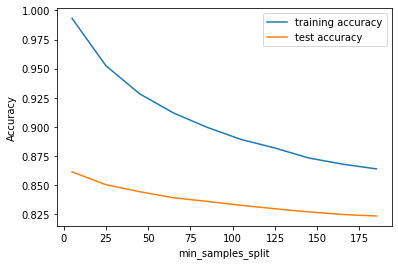

In [102]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#seems 25

In [103]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(10, 20, 5),
    'min_samples_leaf': range(5, 75, 20),
    'min_samples_split': range(5, 75, 20),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier(class_weight='balanced')
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, refit='recall_score',
                          cv = n_folds, verbose = 1, n_jobs = -1)

# Fit the grid search to the data
grid_search.fit(train_pca,y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:  9.7min finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(10, 20, 5),
                         'min_samples_leaf': range(5, 75, 20),
                         'min_samples_split': range(5, 75, 20)},
             refit='recall_score', verbose=1)

In [104]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,7.632472,0.095799,0.005585,4.884025e-04,entropy,10,5,5,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.820455,0.832209,0.837899,0.822946,0.825857,0.827873,0.006367,33
1,7.345577,0.165155,0.005785,7.462255e-04,entropy,10,5,25,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.817941,0.831679,0.834987,0.821887,0.823475,0.825994,0.006345,42
2,7.349891,0.150936,0.005984,4.523674e-07,entropy,10,5,45,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.815295,0.827709,0.832870,0.818579,0.822019,0.823295,0.006309,50
3,7.315950,0.121038,0.007580,4.212646e-03,entropy,10,5,65,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.813310,0.827445,0.832738,0.817123,0.823078,0.822739,0.006967,51
4,10.008619,0.848068,0.005984,4.422006e-07,entropy,10,25,5,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.816750,0.823607,0.836708,0.815800,0.825592,0.823691,0.007530,47


In [105]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.8584663691868413
DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=15, min_samples_leaf=5, min_samples_split=5)


In [106]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini",class_weight='balanced',
                                  random_state = 100,
                                  max_depth=15, 
                                  min_samples_leaf=5,
                                  min_samples_split=5)
clf_gini.fit(train_pca,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=5, min_samples_split=5,
                       random_state=100)

In [107]:
y_pred_default = clf_gini.predict(test_pca)
confusion_tree_hyper=confusion_matrix(y_test,y_pred_default)
confusion_tree_hyper

array([[5159, 2921],
       [ 517,  409]], dtype=int64)

In [108]:
printingConfusionMetricDetails(confusion_tree_hyper)

Acuracy Score 0.6182544970019986
Sensitivity:  0.44168466522678185
Specificity:  0.638490099009901
false postive rate:  0.361509900990099
positive predictive value:  0.12282282282282282
Negative predictive value:  0.9089147286821705
Misclassification Rate:  0.3817455029980013


In [109]:
# Random forest

# Importing random forest classifier from sklearn library
# Running the random forest with default parameters.
rfc = RandomForestClassifier(class_weight='balanced')

# fit
rfc.fit(train_pca,y_train)

# Making predictions
y_pred_default = rfc.predict(test_pca)

In [110]:
confusion_rf=confusion_matrix(y_test,y_pred_default)
confusion_rf

array([[7534,  546],
       [ 882,   44]], dtype=int64)

In [111]:
printingConfusionMetricDetails(confusion_tree_hyper)

Acuracy Score 0.8414390406395736
Sensitivity:  0.44168466522678185
Specificity:  0.638490099009901
false postive rate:  0.361509900990099
positive predictive value:  0.12282282282282282
Negative predictive value:  0.9089147286821705
Misclassification Rate:  0.3817455029980013


In [112]:
#Lets do some hyper parameter tuning  for RF

# GridSearchCV to find optimal n_estimators

# specify number of folds for k-fold CV
n_folds = 5
# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf_with_pca = RandomForestClassifier(class_weight='balanced')


# fit tree on training data
rf_with_pca = GridSearchCV(rf_with_pca, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", n_jobs=-1, return_train_score=True)
rf_with_pca.fit(train_pca, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(class_weight='balanced'),
             n_jobs=-1, param_grid={'max_depth': range(2, 20, 5)},
             return_train_score=True, scoring='accuracy')

In [113]:
# scores of GridSearch CV
scores = rf_with_pca.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,8.757252,0.144901,0.117486,0.011791,2,{'max_depth': 2},0.774544,0.800715,0.793172,0.785100,...,0.788202,0.008694,4,0.789136,0.793113,0.797115,0.792385,0.782295,0.790809,0.004957
1,26.661162,1.692119,0.154187,0.025455,7,{'max_depth': 7},0.839375,0.850602,0.852322,0.848088,...,0.848516,0.004818,3,0.866481,0.865758,0.865957,0.864799,0.864203,0.865440,0.000824
2,47.826146,1.972050,0.239366,0.040154,12,{'max_depth': 12},0.912278,0.912796,0.912796,0.914384,...,0.913751,0.001546,2,0.959607,0.957987,0.958450,0.960303,0.959807,0.959231,0.000869
3,45.425602,5.775846,0.208474,0.037383,17,{'max_depth': 17},0.935830,0.935556,0.935027,0.937806,...,0.936564,0.001386,1,0.987727,0.986999,0.987959,0.987429,0.987065,0.987436,0.000370


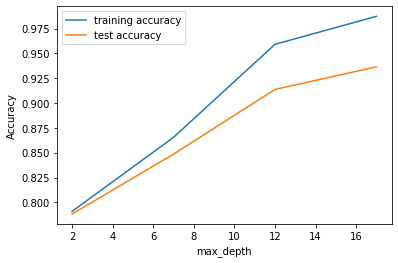

In [114]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#seems 11 to 13

In [115]:
# Tuning n_estimators
# GridSearchCV to find optimal n_estimators

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 400)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=10, class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", n_jobs=-1, verbose = 1, return_train_score=True)
rf.fit(train_pca, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              max_depth=10),
             n_jobs=-1, param_grid={'n_estimators': range(100, 1500, 400)},
             return_train_score=True, scoring='accuracy')

In [116]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,35.586833,0.626878,0.185728,0.010310,100,{'n_estimators': 100},0.882641,0.889639,0.888712,0.887389,...,0.888716,0.004038,4,0.928742,0.924741,0.925634,0.927189,0.927123,0.926686,0.001383
1,227.803502,5.123198,1.204490,0.344787,500,{'n_estimators': 500},0.884890,0.890168,0.893476,0.890300,...,0.890356,0.003045,2,0.930528,0.925304,0.928016,0.928744,0.926594,0.927837,0.001792
2,350.338348,32.562944,1.661721,0.083950,900,{'n_estimators': 900},0.885287,0.891227,0.892021,0.891359,...,0.890833,0.002980,1,0.929039,0.927156,0.928281,0.928347,0.926891,0.927943,0.000801
3,389.329629,45.827094,1.923320,0.417349,1300,{'n_estimators': 1300},0.884758,0.890565,0.892418,0.890036,...,0.890330,0.003102,3,0.929966,0.926759,0.928281,0.927917,0.926891,0.927963,0.001159


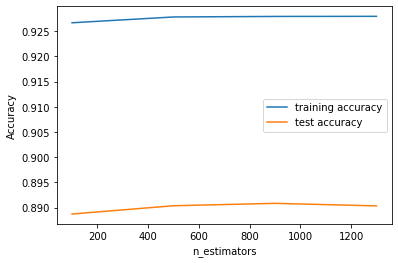

In [117]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [118]:
# GridSearchCV to find optimal max_features
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24]}

# instantiate the model
rf = RandomForestClassifier(max_depth=10,class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", n_jobs=-1, return_train_score=True, verbose = 1)
rf.fit(train_pca, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              max_depth=10),
             n_jobs=-1, param_grid={'max_features': [4, 8, 14, 20, 24]},
             return_train_score=True, scoring='accuracy')

In [119]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,17.429220,0.292005,0.159786,0.005492,4,{'max_features': 4},0.875099,0.881964,0.885801,0.881567,...,0.881914,0.003797,5,0.919115,0.916405,0.919680,0.919581,0.916570,0.918270,0.001469
1,32.368773,0.345454,0.169151,0.016524,8,{'max_features': 8},0.885684,0.890697,0.892285,0.890697,...,0.889880,0.002225,4,0.930429,0.928049,0.927785,0.927156,0.925403,0.927764,0.001620
2,54.967137,1.693201,0.234678,0.087029,14,{'max_features': 14},0.889521,0.893079,0.894535,0.893344,...,0.893691,0.002719,3,0.934002,0.932019,0.931126,0.932945,0.931887,0.932396,0.000989
3,102.542143,6.390437,0.197671,0.030762,20,{'max_features': 20},0.891373,0.893344,0.900357,0.894270,...,0.895808,0.003575,2,0.938004,0.933144,0.935360,0.933210,0.935459,0.935035,0.001790
4,98.680801,11.690669,0.180420,0.039751,24,{'max_features': 24},0.891638,0.896255,0.899828,0.895593,...,0.896549,0.002972,1,0.937641,0.935162,0.936518,0.935790,0.935856,0.936193,0.000841


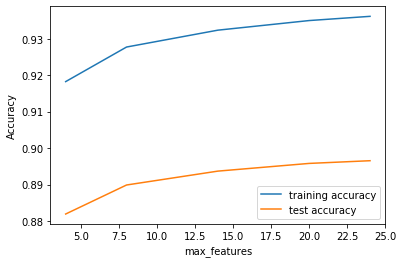

In [120]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# 8 to 12

In [121]:
# GridSearchCV to find optimal min_samples_leaf

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model
rf = RandomForestClassifier(class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", n_jobs=-1, return_train_score=True, verbose = 1)
rf.fit(train_pca, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(class_weight='balanced'),
             n_jobs=-1, param_grid={'min_samples_leaf': range(100, 400, 50)},
             return_train_score=True, scoring='accuracy')

In [122]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,38.760294,1.469566,0.180916,0.020112,100,{'min_samples_leaf': 100},0.832495,0.852719,0.853249,0.848485,...,0.847219,0.007599,1,0.864794,0.861424,0.862582,0.862053,0.859440,0.862059,0.001733
1,35.915409,2.971512,0.175939,0.011054,150,{'min_samples_leaf': 150},0.825880,0.843986,0.840942,0.839222,...,0.839015,0.006890,2,0.852256,0.848060,0.849813,0.851136,0.848457,0.849944,0.001584
2,29.619494,0.403917,0.175730,0.013071,200,{'min_samples_leaf': 200},0.822572,0.838560,0.834590,0.832473,...,0.832663,0.005411,3,0.843853,0.842039,0.840716,0.843197,0.840716,0.842104,0.001274
3,28.164368,0.142065,0.170144,0.028164,250,{'min_samples_leaf': 250},0.818074,0.836708,0.832209,0.831282,...,0.831022,0.006860,4,0.840281,0.835258,0.834861,0.837044,0.837904,0.837069,0.001958
4,26.304339,0.155591,0.157680,0.012858,300,{'min_samples_leaf': 300},0.813310,0.832473,0.829959,0.825063,...,0.826762,0.007289,5,0.835120,0.832247,0.833273,0.833074,0.832214,0.833186,0.001057


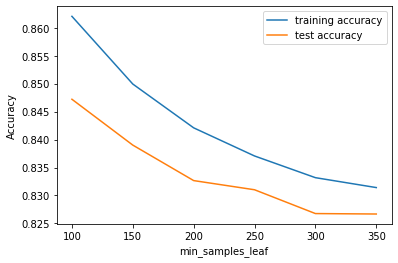

In [123]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#seems 100 to 150

In [124]:
# GridSearchCV to find optimal min_samples_split

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}

# instantiate the model
rf = RandomForestClassifier(class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", return_train_score=True, n_jobs=-1, verbose = 1)
rf.fit(train_pca, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(class_weight='balanced'),
             param_grid={'min_samples_split': range(200, 500, 50)},
             return_train_score=True, scoring='accuracy')

In [125]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,28.519684,3.342555,0.136835,0.023520,200,{'min_samples_split': 200},0.850754,0.867937,0.864629,0.861453,...,0.861774,0.005884,1,0.891392,0.886169,0.886037,0.886467,0.885838,0.887180,0.002116
1,22.266882,0.682596,0.108710,0.006340,250,{'min_samples_split': 250},0.843080,0.863173,0.859071,0.857086,...,0.856746,0.007135,2,0.879780,0.876179,0.875914,0.877535,0.875120,0.876905,0.001635
2,24.141705,1.890933,0.118385,0.015022,300,{'min_samples_split': 300},0.838052,0.855895,0.856689,0.851528,...,0.852194,0.007457,3,0.873528,0.868636,0.869232,0.869562,0.870059,0.870203,0.001725
3,21.803454,1.130950,0.116901,0.023161,350,{'min_samples_split': 350},0.833157,0.853513,0.853116,0.845309,...,0.847801,0.007986,4,0.868532,0.864468,0.863575,0.863773,0.864203,0.864910,0.001838
4,21.223079,2.645612,0.124068,0.036891,400,{'min_samples_split': 400},0.831437,0.849940,0.847691,0.848485,...,0.845763,0.007267,5,0.864629,0.858712,0.859870,0.859969,0.860267,0.860689,0.002040


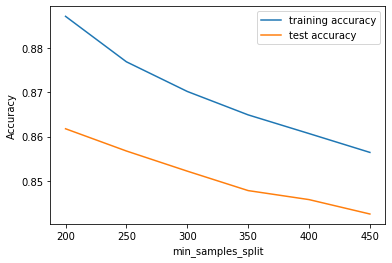

In [126]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# 200 to 300

In [127]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [11,14],
    'min_samples_leaf': range(100, 150, 50),
    'min_samples_split': range(200, 400, 100),
    'n_estimators': range(200, 600, 100), 
    'max_features': [8, 10, 12]
}
# Create a based model
rf = RandomForestClassifier(class_weight='balanced')

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,refit='recall_score' ,
                          cv = 5, n_jobs=-1, verbose = 1)

In [128]:
# Fit the grid search to the data
grid_search.fit(train_pca, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 13.9min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed: 52.6min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'max_depth': [8, 10], 'max_features': [8, 10, 12],
                         'min_samples_leaf': range(100, 200, 100),
                         'min_samples_split': range(200, 400, 100),
                         'n_estimators': range(200, 400, 100)},
             refit='recall_score', verbose=1)

In [129]:
# printing the optimal accuracy score and hyperparameters
print('Accuracy got is',grid_search.best_score_,'using',grid_search.best_params_)

Accuracy got is 0.8477745862502578 using {'max_depth': 10, 'max_features': 12, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 200}


In [139]:
# model with the best hyperparameters

rfc = RandomForestClassifier(bootstrap=True, class_weight='balanced',
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=12,
                             n_estimators=200)

In [140]:
rfc.fit(train_pca,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, max_features=12,
                       min_samples_leaf=100, min_samples_split=200,
                       n_estimators=200)

In [141]:
# predict
y_pred_default = rfc.predict(test_pca)

In [142]:
# Confusion Matrix
confusion_rf_hyper=confusion_matrix(y_test,y_pred_default)
confusion_rf_hyper

array([[5241, 2839],
       [ 479,  447]], dtype=int64)

In [143]:
printingConfusionMetricDetails(confusion_tree_hyper)

Acuracy Score 0.631578947368421
Sensitivity:  0.44168466522678185
Specificity:  0.638490099009901
false postive rate:  0.361509900990099
positive predictive value:  0.12282282282282282
Negative predictive value:  0.9089147286821705
Misclassification Rate:  0.3817455029980013


In [135]:

#first logistic reg - accu - 86, Se - 76 , Spec - 86
# PCA - Logisc - acc-52, Sen - 66, Sepc - 50
# DT - first - Acc - 52, Sen -69 , Spec - 61
# DT - tuning - Acc - 62, Sen - 44, Spec - 63
# RF - - first - Acc  84, Sen - 44, Sepc - 64
# RF - post tuning - Acc - 63 Sen - 44, Sepc - 64
# 
# RF seems to have hte highest Accuracy post PCA

In [136]:
# let us use RF on full data set to get the important parameters